In [24]:
import os
import shutil
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [25]:
os.getcwd()

'C:\\Users\\SABYA\\Aritar01\\CAP_106\\CAP_106_Research_Env'

In [26]:
df = pd.read_excel("C:/Users/SABYA/Aritar01/CAP_106/Raw_Data/BA_106.xlsx")

In [27]:
# separate date column
date = df['Date']
# drop date
df1 = df.drop(labels=["Date"], axis=1)

In [28]:
# converting object dtype into float
df2 = df1.astype('float')

In [29]:
# concat date and df2
df3 = pd.concat([date, df2], axis=1)

In [30]:
# columns to keep
ls = [
    'Date',
 'RUN Duration, hours',
 'RUN No.',
 'NpahthaFeedCoil1',
 'NpahthaFeedCoil2',
 'NpahthaFeedCoil3',
 'NpahthaFeedCoil4',
 'NpahthaFeedCoil5',
 'NpahthaFeedCoil6',
 'DS RateCoil1',
 'DS RateCoil2',
 'DS RateCoil3',
 'DS RateCoil4',
 'DS RateCoil5',
 'DS RateCoil6',
 'COT1',
 'COT2',
 'COT3',
 'COT4',
 'COT5',
 'COT6',
 'CIP1',
 'CIP2',
 'CIP3',
 'CIP4',
 'CIP5',
 'CIP6',
 'Wall_Fuel_Gas_Flow',
 'Ground_Fuel_Gas_Flow',
 'O2',
 'CrossOverTemp_Coil1',
 'CrossOverTemp_Coil2',
 'CrossOverTemp_Coil3',
 'CrossOverTemp_Coil4',
 'CrossOverTemp_Coil5',
 'CrossOverTemp_Coil6'
]
df4 = df3[ls]

In [31]:
# calulate mean, max and average of individual colis
total_naphtha_feed = df4[['NpahthaFeedCoil1',
 'NpahthaFeedCoil2',
 'NpahthaFeedCoil3',
 'NpahthaFeedCoil4',
 'NpahthaFeedCoil5',
 'NpahthaFeedCoil6']].sum(axis=1)
total_ds_rate = df4[['DS RateCoil1',
 'DS RateCoil2',
 'DS RateCoil3',
 'DS RateCoil4',
 'DS RateCoil5',
 'DS RateCoil6']].sum(axis=1)
avg_cot = df4[['COT1',
 'COT2',
 'COT3',
 'COT4',
 'COT5',
 'COT6']].mean(axis=1)
max_cip = df4[['CIP1',
 'CIP2',
 'CIP3',
 'CIP4',
 'CIP5',
 'CIP6'
 ]].max(axis=1)
avg_cross_over_temp = df4[['CrossOverTemp_Coil1',
 'CrossOverTemp_Coil2',
 'CrossOverTemp_Coil3',
 'CrossOverTemp_Coil4',
 'CrossOverTemp_Coil5',
 'CrossOverTemp_Coil6']].mean(axis=1)

ds_ratio_coil1 = df4["DS RateCoil1"] / df4["NpahthaFeedCoil1"]
ds_ratio_coil2 = df4["DS RateCoil2"] / df4["NpahthaFeedCoil2"]
ds_ratio_coil3 = df4["DS RateCoil3"] / df4["NpahthaFeedCoil3"]
ds_ratio_coil4 = df4["DS RateCoil4"] / df4["NpahthaFeedCoil4"]
ds_ratio_coil5 = df4["DS RateCoil5"] / df4["NpahthaFeedCoil5"]
ds_ratio_coil6 = df4["DS RateCoil6"] / df4["NpahthaFeedCoil6"]

total_ds_ratio = total_ds_rate / total_naphtha_feed

In [32]:
df4["DSRatioCoil1"] = ds_ratio_coil1
df4["DSRatioCoil2"] = ds_ratio_coil2
df4["DSRatioCoil3"] = ds_ratio_coil3
df4["DSRatioCoil4"] = ds_ratio_coil4
df4["DSRatioCoil5"] = ds_ratio_coil5
df4["DSRatioCoil6"] = ds_ratio_coil6
df4["Total_Naphtha_Feed"] = total_naphtha_feed
df4["Total_DS_Rate"] = total_ds_rate
df4["Total_Ds_Ratio"] = total_ds_ratio
df4["Avg_COT"] = avg_cot
df4["Avg_CIT"] = avg_cross_over_temp
df4["Max_CIP"] = max_cip

In [33]:
# Read the additional data
df5 = pd.read_excel("C:/Users/SABYA/Aritar01/CAP_106/Raw_Data/Additional_BA_106.xlsx")

In [34]:
# separate the date column from df8
date1 = df5['Date']

In [35]:
# create a date range list for the date column
date1_df = pd.DataFrame(pd.date_range(list(df5['Date'])[0], periods=df5.shape[0], freq='1h'), columns=['Date'])

In [36]:
# drop the date column from df8
df6 = df5.drop(labels=['Date'], axis=1)

In [37]:
# concat the above created date1_df with df9
df7 = pd.concat([date1_df, df6], axis=1)

In [38]:
# merge df7 and df10 on date column to get the final dataframe
df_final = pd.merge(df7, df4, on='Date').reset_index(drop=True)

In [39]:
df_final["Avg_Feed_Temp"] = df_final[["Feed Temp1", "Feed Temp2"]].mean(axis=1)

In [40]:
# paths to store the correlation heatmaps and correlation dataframe
heat_path = "C:/Users/SABYA/Aritar01/CAP_106/CAP_106_Research_Env/EDA_Report/Heatmaps"
data_path = "C:/Users/SABYA/Aritar01/CAP_106/CAP_106_Research_Env/EDA_Report/CorrInfo"

In [53]:
# correlation analysis for Naphtha Feed
df_naphtha_feed = df_final[['NpahthaFeedCoil1',
                        'NpahthaFeedCoil2', 
                        'NpahthaFeedCoil3',
                        'NpahthaFeedCoil4',
                        'NpahthaFeedCoil5', 
                        'NpahthaFeedCoil6',
                        'Total_Naphtha_Feed']]

In [55]:
# computing the upper triangle correlation matrix
corr_mat_1 = df_naphtha_feed.corr().abs()
upper_tri_1 = corr_mat_1.where(np.triu(np.ones(corr_mat_1.shape), k=1).astype(np.bool))
upper_tri_1

,NpahthaFeedCoil1,NpahthaFeedCoil2,NpahthaFeedCoil3,NpahthaFeedCoil4,NpahthaFeedCoil5,NpahthaFeedCoil6,Total_Naphtha_Feed
NpahthaFeedCoil1,NaN,1.0,0.946073,0.897699,0.901798,0.874288,0.976141
NpahthaFeedCoil2,NaN,NaN,0.946073,0.897699,0.901798,0.874288,0.976141
NpahthaFeedCoil3,NaN,NaN,NaN,0.943067,0.909380,0.873447,0.975046
NpahthaFeedCoil4,NaN,NaN,NaN,NaN,0.934730,0.830603,0.954818
NpahthaFeedCoil5,NaN,NaN,NaN,NaN,NaN,0.878741,0.958173
NpahthaFeedCoil6,NaN,NaN,NaN,NaN,NaN,NaN,0.923201
Total_Naphtha_Feed,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
# store the corr dataframe for Naphtha Feed
df_naptha_corr = pd.DataFrame(corr_mat_1["Total_Naphtha_Feed"])
df_naptha_corr.to_excel(data_path + "/naphtha_feed_corr_info.xlsx")

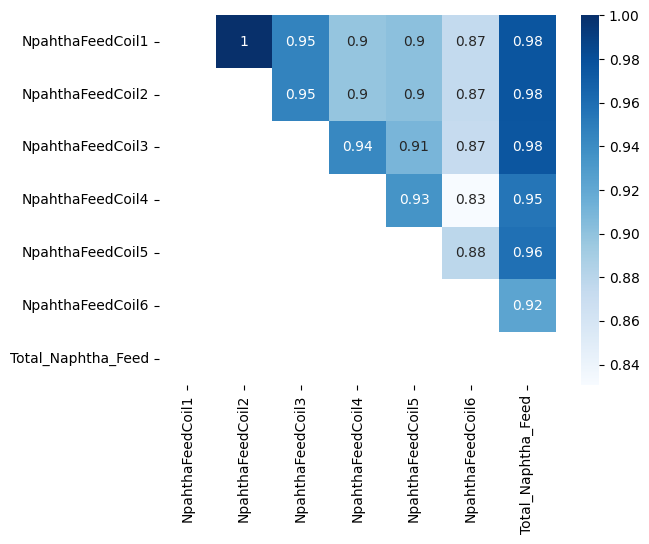

In [56]:
# plotting correlation heatmap for Naphtha Feed
dataplot = sb.heatmap(upper_tri_1, cmap="Blues", annot=True)
  
# displaying heatmap
# plt.show()

# save the plot as .png
plt.savefig(heat_path +"/naphtha_feed_corr_heatmap.png")

In [61]:
# finding index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper_tri_1.columns if any(upper_tri_1[column] > 0.90)]
print(); print(to_drop) 


['NpahthaFeedCoil2', 'NpahthaFeedCoil3', 'NpahthaFeedCoil4', 'NpahthaFeedCoil5', 'Total_Naphtha_Feed']


In [62]:
# correlation analysis for COT
df_cot = df_final[['COT1',
                   'COT2', 
                   'COT3', 
                   'COT4', 
                   'COT5', 
                   'COT6', 
                   'Avg_COT']]

In [64]:
# computing the upper triangle correlation matrix
corr_mat_2 = df_cot.corr().abs()
upper_tri_2 = corr_mat_2.where(np.triu(np.ones(corr_mat_2.shape), k=1).astype(np.bool))
upper_tri_2

,COT1,COT2,COT3,COT4,COT5,COT6,Avg_COT
COT1,NaN,0.994542,0.996660,0.984479,0.983311,0.984334,0.995378
COT2,NaN,NaN,0.994867,0.982464,0.976945,0.978880,0.992669
COT3,NaN,NaN,NaN,0.989022,0.987816,0.988754,0.997783
COT4,NaN,NaN,NaN,NaN,0.988069,0.988746,0.993970
COT5,NaN,NaN,NaN,NaN,NaN,0.998200,0.994431
COT6,NaN,NaN,NaN,NaN,NaN,NaN,0.995174
Avg_COT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
# store the corr dataframe for COT
df_cot_corr = pd.DataFrame(corr_mat_2["Avg_COT"])
df_cot_corr.to_excel(data_path + "/cot_corr_info.xlsx")

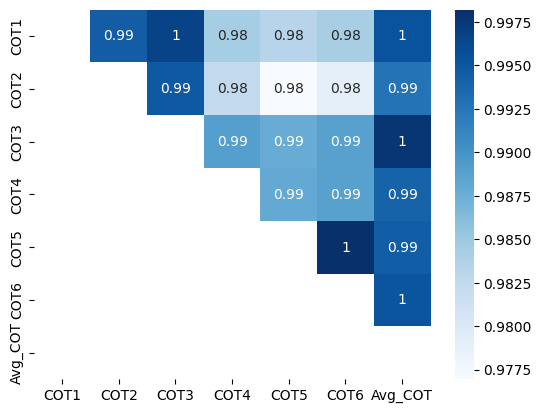

In [66]:
# plotting correlation heatmap for COT
dataplot = sb.heatmap(upper_tri_2, cmap="Blues", annot=True)
  
# displaying heatmap
# plt.show()

# save the plot as .png
plt.savefig(heat_path +"/cot_corr_heatmap.png")

In [68]:
# correlation analysis for DS Ratio
df_ds_ratio = df_final[['DSRatioCoil1',
                    'DSRatioCoil2',
                    'DSRatioCoil3',
                    'DSRatioCoil4',
                    'DSRatioCoil5',
                    'DSRatioCoil6',
                    'Total_Ds_Ratio']]

In [69]:
# computing the upper triangle correlation matrix
corr_mat_3 = df_ds_ratio.corr().abs()
upper_tri_3 = corr_mat_3.where(np.triu(np.ones(corr_mat_3.shape), k=1).astype(np.bool))
upper_tri_3

,DSRatioCoil1,DSRatioCoil2,DSRatioCoil3,DSRatioCoil4,DSRatioCoil5,DSRatioCoil6,Total_Ds_Ratio
DSRatioCoil1,NaN,0.993589,0.967785,0.919913,0.922901,0.920448,0.979178
DSRatioCoil2,NaN,NaN,0.959771,0.910428,0.921540,0.911969,0.974530
DSRatioCoil3,NaN,NaN,NaN,0.957310,0.942442,0.931396,0.986099
DSRatioCoil4,NaN,NaN,NaN,NaN,0.959668,0.906725,0.967768
DSRatioCoil5,NaN,NaN,NaN,NaN,NaN,0.945599,0.974102
DSRatioCoil6,NaN,NaN,NaN,NaN,NaN,NaN,0.961015
Total_Ds_Ratio,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [70]:
# store the corr dataframe for DS Ratio
df_ds_ratio_corr = pd.DataFrame(corr_mat_3["Total_Ds_Ratio"])
df_ds_ratio_corr.to_excel(data_path + "/ds_ratio_corr_info.xlsx")

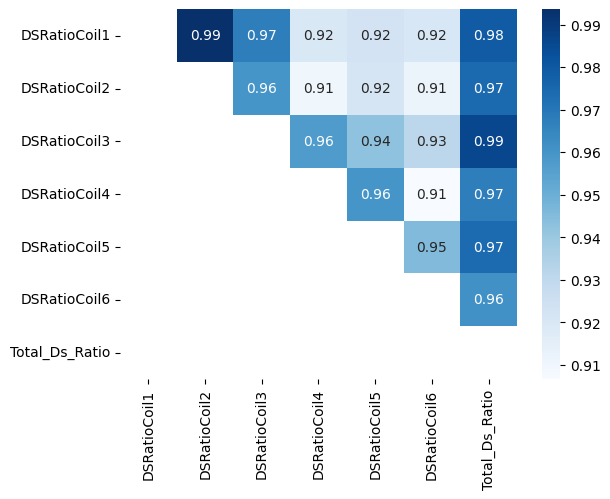

In [71]:
# plotting correlation heatmap for COT
dataplot = sb.heatmap(upper_tri_3, cmap="Blues", annot=True)
  
# displaying heatmap
# plt.show()

# save the plot as .png
plt.savefig(heat_path +"/ds_ratio_corr_heatmap.png")

In [75]:
# correlation analysis for CrossOver Temperature
df_cit = df_final[['CrossOverTemp_Coil1',
                        'CrossOverTemp_Coil2',
                        'CrossOverTemp_Coil3',
                        'CrossOverTemp_Coil4',
                        'CrossOverTemp_Coil5',
                        'CrossOverTemp_Coil6',
                        'Avg_CIT']]

In [76]:
# computing the upper triangle correlation matrix
corr_mat_4 = df_cit.corr().abs()
upper_tri_4 = corr_mat_4.where(np.triu(np.ones(corr_mat_4.shape), k=1).astype(np.bool))
upper_tri_4

,CrossOverTemp_Coil1,CrossOverTemp_Coil2,CrossOverTemp_Coil3,CrossOverTemp_Coil4,CrossOverTemp_Coil5,CrossOverTemp_Coil6,Avg_CIT
CrossOverTemp_Coil1,NaN,0.930759,0.787259,0.747513,0.801074,0.814699,0.910550
CrossOverTemp_Coil2,NaN,NaN,0.859113,0.863357,0.860695,0.891163,0.967570
CrossOverTemp_Coil3,NaN,NaN,NaN,0.867398,0.868379,0.722841,0.916352
CrossOverTemp_Coil4,NaN,NaN,NaN,NaN,0.895777,0.845079,0.934059
CrossOverTemp_Coil5,NaN,NaN,NaN,NaN,NaN,0.856218,0.943875
CrossOverTemp_Coil6,NaN,NaN,NaN,NaN,NaN,NaN,0.915067
Avg_CIT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [77]:
# store the corr dataframe for CIT
df_cit_corr = pd.DataFrame(corr_mat_4["Avg_CIT"])
df_cit_corr.to_excel(data_path + "/cit_corr_info.xlsx")

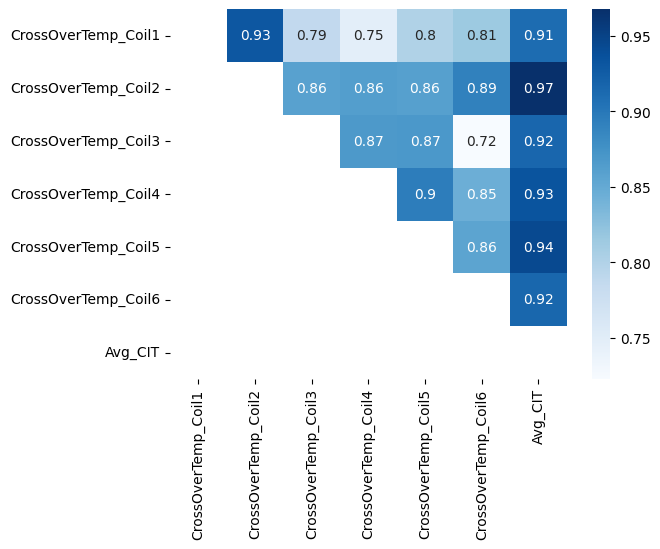

In [78]:
# plotting correlation heatmap for CIT
dataplot = sb.heatmap(upper_tri_4, cmap="Blues", annot=True)
  
# displaying heatmap
# plt.show()

# save the plot as .png
plt.savefig(heat_path +"/cit_corr_heatmap.png")

In [81]:
# correlation analysis for Coil Inlet Pressure
df_cip = df_final[['CIP1',
                    'CIP2',
                    'CIP3',
                    'CIP4',
                    'CIP5',
                    'CIP6',
                    'Max_CIP']]

In [82]:
# computing the upper triangle correlation matrix
corr_mat_5 = df_cip.corr().abs()
upper_tri_5 = corr_mat_5.where(np.triu(np.ones(corr_mat_5.shape), k=1).astype(np.bool))
upper_tri_5

,CIP1,CIP2,CIP3,CIP4,CIP5,CIP6,Max_CIP
CIP1,NaN,0.85518,0.833904,0.803701,0.707814,0.726833,0.827846
CIP2,NaN,NaN,0.877428,0.860928,0.838711,0.803799,0.874255
CIP3,NaN,NaN,NaN,0.800767,0.784365,0.855765,0.968317
CIP4,NaN,NaN,NaN,NaN,0.840201,0.703304,0.813650
CIP5,NaN,NaN,NaN,NaN,NaN,0.706206,0.779563
CIP6,NaN,NaN,NaN,NaN,NaN,NaN,0.923652
Max_CIP,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [83]:
# store the corr dataframe for CIP
df_cip_corr = pd.DataFrame(corr_mat_5["Max_CIP"])
df_cip_corr.to_excel(data_path + "/cip_corr_info.xlsx")

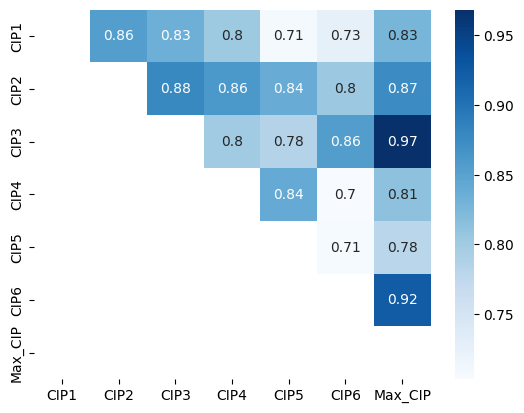

In [84]:
# plotting correlation heatmap for CIT
dataplot = sb.heatmap(upper_tri_5, cmap="Blues", annot=True)
  
# displaying heatmap
# plt.show()

# save the plot as .png
plt.savefig(heat_path +"/cip_corr_heatmap.png")

In [107]:
# correlation analysis for Feed Temperature
df_feed_temp = df_final[['Feed Temp1',
                        'Feed Temp2',
                        'Avg_Feed_Temp']]

In [108]:
# computing the upper triangle correlation matrix
corr_mat_6 = df_feed_temp.corr().abs()
upper_tri_6 = corr_mat_6.where(np.triu(np.ones(corr_mat_6.shape), k=1).astype(np.bool))
upper_tri_6

,Feed Temp1,Feed Temp2,Avg_Feed_Temp
Feed Temp1,NaN,0.130964,0.697351
Feed Temp2,NaN,NaN,0.801884
Avg_Feed_Temp,NaN,NaN,NaN


In [109]:
# store the corr dataframe for Feed Temperature
df_feed_temp_corr = pd.DataFrame(corr_mat_6["Avg_Feed_Temp"])
df_feed_temp_corr.to_excel(data_path + "/feed_temp_corr_info.xlsx")

In [ ]:
# plotting correlation heatmap for Feed Temperature
dataplot = sb.heatmap(upper_tri_6, cmap="Blues", annot=True)
  
# displaying heatmap
# plt.show()

# save the plot as .png
plt.savefig(heat_path +"/feed_temp_corr_heatmap.png")

1. Predict Max CIP
2. Predicting Furnace Runlength

In [113]:
df_other_features = df_final[['BFW Rate',
                             'DS Temp',
                             'Feed Temp1',
                             'Feed Temp2',
                             'Wall_Fuel_Gas_Flow',
                             'Ground_Fuel_Gas_Flow',
                             'O2',
                             'Total_Naphtha_Feed',
                             'Total_Ds_Ratio',
                             'Avg_COT',
                             'Avg_CIT',
                             'Max_CIP']]

In [114]:
# computing the upper triangle correlation matrix
corr_mat_7 = df_other_features.corr().abs()
upper_tri_7 = corr_mat_7.where(np.triu(np.ones(corr_mat_7.shape), k=1).astype(np.bool))
upper_tri_7

,BFW Rate,DS Temp,Feed Temp1,Feed Temp2,Wall_Fuel_Gas_Flow,Ground_Fuel_Gas_Flow,O2,Total_Naphtha_Feed,Total_DS_Rate,Total_Ds_Ratio,Avg_COT,Avg_CIT,Max_CIP
BFW Rate,NaN,0.033698,0.184024,0.075508,0.031456,0.004834,0.127736,0.049614,0.007614,0.035570,0.012044,0.043155,0.021719
DS Temp,NaN,NaN,0.018314,0.375254,0.064225,0.168460,0.143649,0.068311,0.063978,0.067906,0.102629,0.110035,0.076966
Feed Temp1,NaN,NaN,NaN,0.130964,0.028764,0.028453,0.023151,0.310003,0.110414,0.259252,0.200089,0.100671,0.203547
Feed Temp2,NaN,NaN,NaN,NaN,0.004336,0.135091,0.098467,0.162142,0.037289,0.130386,0.007773,0.250588,0.186820
Wall_Fuel_Gas_Flow,NaN,NaN,NaN,NaN,NaN,0.513810,0.186098,0.528354,0.079184,0.531169,0.439272,0.081676,0.305746
Ground_Fuel_Gas_Flow,NaN,NaN,NaN,NaN,NaN,NaN,0.377884,0.560438,0.128015,0.484715,0.291002,0.189063,0.126261
O2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.469397,0.143757,0.437036,0.338278,0.087413,0.223219
Total_Naphtha_Feed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.106227,0.918632,0.490487,0.036706,0.323360
Total_DS_Rate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.346569,0.125926,0.080228,0.054765
Total_Ds_Ratio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.490624,0.050900,0.283976


<AxesSubplot:>

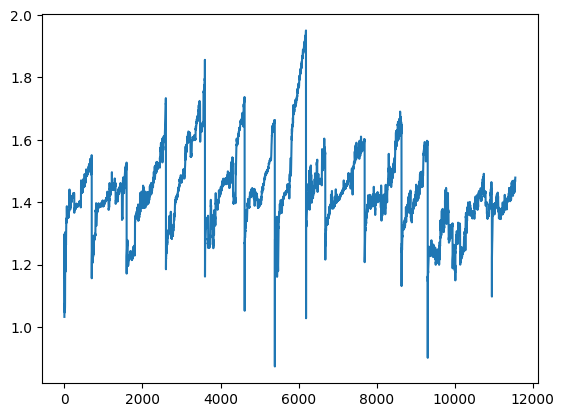

In [51]:
df_final["Max_CIP"].plot()